In [3]:
#Trevor Taylor

#First we must import a dataset
#The data set I used is one for evaluating a car based on 
#buying price, maintence price, number of doors, number of seats, size of luggage boot, and its safety
#The ratings of the car are unacceptable, acceptable, good, verygood

import pandas as pd
import numpy as np
test_inputs = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', delimiter=',')
test_inputs = np.asarray(test_inputs)

In [25]:
#There are some future warnings when running this code so to keep the data clean we use

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Here we can see the data 
#Notice how there are note many numbers 

test_inputs

array([['vhigh', 'vhigh', '2', ..., 'small', 'med', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'high', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'med', 'low', 'unacc'],
       ...,
       ['low', 'low', '5more', ..., 'big', 'low', 'unacc'],
       ['low', 'low', '5more', ..., 'big', 'med', 'good'],
       ['low', 'low', '5more', ..., 'big', 'high', 'vgood']], dtype=object)

In [5]:
#To fix the issue of a lack of numbers we will turn each of the strings into a integer value

test_inputs[test_inputs == 'vhigh'] = 4
test_inputs[test_inputs == 'high'] = 3
test_inputs[test_inputs == 'med'] = 2
test_inputs[test_inputs == 'low'] = 1

test_inputs[test_inputs == 'unacc'] = 1
test_inputs[test_inputs == 'acc'] = 2
test_inputs[test_inputs == 'good'] = 3
test_inputs[test_inputs == 'vgood'] = 4

test_inputs[test_inputs == '5more'] = 6
test_inputs[test_inputs == 'small'] = 1
test_inputs[test_inputs == 'med'] = 2
test_inputs[test_inputs == 'big'] = 3
test_inputs[test_inputs == 'more'] = 5

In [9]:
#Running the same array again now gives us pureply numerical factors

test_inputs

array([[4, 4, '2', ..., 1, 2, 1],
       [4, 4, '2', ..., 1, 3, 1],
       [4, 4, '2', ..., 2, 1, 1],
       ...,
       [1, 1, 6, ..., 3, 1, 1],
       [1, 1, 6, ..., 3, 2, 3],
       [1, 1, 6, ..., 3, 3, 4]], dtype=object)

In [10]:
#We now split the array into a data set and a target set

X = test_inputs[:,0:6] #data 
Y = test_inputs[:,6] #target

In [11]:
#We need to change the dtype of Y from object to int to prevent errors down the line

Y=Y.astype('int')

In [12]:
#We import modules from sklearn to be able to train and test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [13]:
#Check to make sure there are no errors in splitting the total into train and test

len(X)

1727

In [14]:
len(X_train)

1295

In [15]:
len(X_test)

432

In [16]:
#Import Kneighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

In [17]:
#Using Kneighbors classifier 

estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
#We can use the estimator to see how close it is to the values we sectioned off earlier as test values

y_predicted = estimator.predict(X_test)

#This accuracy test is just to see how often the values were the same between both
#The percentage was 93.3% which is quite good

accuracy = np.mean(y_test == y_predicted) *100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 93.3%


In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
average_accuracy = np.mean(scores)*100
print("The accuracy is {0:.1f}%".format(average_accuracy))

The accuracy is 82.7%


In [22]:
#It is important to see how the parameters in Kneighbors changes the overall value
#The biggest factor is the n_neighbors parameter

avg_scores = []
all_scores = []
parameters = list(range(1,100))
for n_neighbors in parameters:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, Y, scoring = 'accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

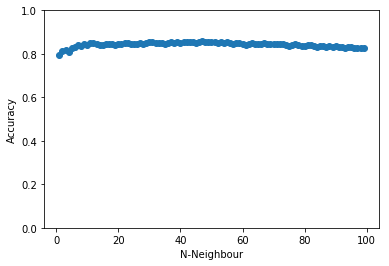

In [26]:
#This is a graph of the values of accuracy for Kneighbors values from 1 to a hundred
#Overall there is little diffrence however it does seem to slightly drop off at very small and very large values of n

import matplotlib.pyplot as plt
plt.plot(parameters, avg_scores, '-o')
plt.xlabel('N-Neighbour')
plt.ylabel('Accuracy')
plt.ylim([0,1.0])

plt.show()